In [8]:

X = ops_df[[NUM_COL]].astype(float).values
if SCALE_DATA:
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
else:
    X_scaled = X

nbrs = NearestNeighbors(n_neighbors=2).fit(X_scaled)
distances, _ = nbrs.kneighbors(X_scaled)
kdist = np.sort(distances[:,1])
eps_auto = np.percentile(kdist, PCT_KDIST)
print(f'Auto eps: {eps_auto:.6g}')


Auto eps: 0.000334292


In [9]:

model = DBSCAN(eps=eps_auto, min_samples=MIN_SAMPLES).fit(X_scaled)
ops_df['cluster'] = model.labels_
print('Cluster counts:', ops_df['cluster'].value_counts().to_dict())


Cluster counts: {-1: 190, 0: 2, 1: 2, 2: 2, 3: 2, 4: 2}


In [10]:

numeric_cols = [NUM_COL] + [f'delta_{k}' for k in CONST.keys()]
agg_dict = {col:['mean','min','max'] for col in numeric_cols}
cluster_summary = ops_df.groupby('cluster').agg(agg_dict)
cluster_summary


slice                     delta_alpha_inv                      \
             mean       min       max            mean       min       max   
cluster                                                                     
-1       0.007976  0.000695  0.015377        0.999942  0.999888  0.999995   
 0       0.001084  0.001083  0.001084        0.999992  0.999992  0.999992   
 1       0.004040  0.004039  0.004040        0.999971  0.999971  0.999971   
 2       0.010966  0.010965  0.010966        0.999920  0.999920  0.999920   
 3       0.013178  0.013178  0.013178        0.999904  0.999904  0.999904   
 4       0.014032  0.014032  0.014033        0.999898  0.999898  0.999898   

        delta_phi                     delta_sqrt2                      \
             mean       min       max        mean       min       max   
cluster                                                                 
-1       0.995071  0.990497  0.999571    0.994360  0.989127  0.999509   
 0       0.999330  0.999330  0.999331    0.999234  0.999233  0.999234   
 1       0.997503  0.997503  0.997504    0.997143  0.997143  0.997144   
 2       0.993223  0.993222  0.993223    0.992246  0.992246  0.992247   
 3       0.991855  0.991855  0.991855    0.990682  0.990681  0.990682   
 4       0.991327  0.991327  0.991328    0.990078  0.990077  0.990078   

          delta_e                      
             mean       min       max  
cluster                                
-1       0.997066  0.994343  0.999744  
 0       0.999601  0.999601  0.999602  
 1       0.998514  0.998514  0.998514  
 2       0.995966  0.995966  0.995966  
 3       0.995152  0.995152  0.995152  
 4       0.994838  0.994838  0.994838

In [11]:

import numpy as np, pandas as pd
new_entries = pd.DataFrame()
if PREVIOUS_CSV and Path(PREVIOUS_CSV).exists():
    prev_df = pd.read_csv(PREVIOUS_CSV)
    prev_vals = set(np.round(prev_df[NUM_COL], 12))
    curr_vals = np.round(ops_df[NUM_COL], 12)
    mask_new = [v not in prev_vals for v in curr_vals]
    new_entries = ops_df[mask_new]
    print('New rows vs baseline:', len(new_entries))
else:
    print('Diff skipped.')


Diff skipped.


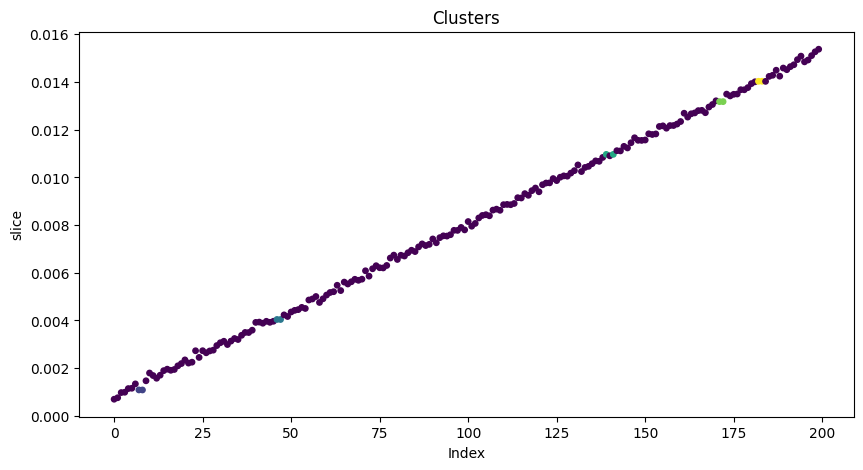

In [12]:

plt.figure(figsize=(10,5))
plt.scatter(ops_df.index, ops_df[NUM_COL], c=ops_df['cluster'], s=15)
plt.xlabel('Index'); plt.ylabel(NUM_COL); plt.title('Clusters')
plt.show()


In [13]:

ops_df.to_csv(EXPORT_NAME, index=False)
print('Saved', EXPORT_NAME)
if not new_entries.empty:
    new_name = 'new_' + EXPORT_NAME
    new_entries.to_csv(new_name, index=False)
    print('Saved', new_name)


Saved clustered_results.csv
